In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("data.csv")

In [71]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [72]:
data = data.drop(columns = ['city','country','statezip'], axis = 1)

In [74]:
data = data.join(pd.get_dummies(data.street)).drop(['street'],axis =1)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 4539 entries, date to Valley View Trail
dtypes: bool(4525), float64(4), int64(9), object(1)
memory usage: 20.3+ MB


In [76]:
data.dropna(inplace=True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 4539 entries, date to Valley View Trail
dtypes: bool(4525), float64(4), int64(9), object(1)
memory usage: 20.3+ MB


In [78]:
data = data.drop(['date'],axis=1)

In [79]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'],axis = 1)
y = data['price']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [81]:
train_data = X_train.join(y_train)

In [82]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail,price
4014,5.0,2.50,2510,8050,1.0,0,0,4,1490,1020,...,False,False,False,False,False,False,False,False,False,475000.000000
2535,3.0,1.75,1990,5560,1.0,0,0,4,1100,890,...,False,False,False,False,False,False,False,False,False,763101.000000
3194,4.0,3.00,3580,35261,1.5,0,0,3,3580,0,...,False,False,False,False,False,False,False,False,False,925000.000000
1040,4.0,2.50,2303,3680,2.0,0,0,3,2303,0,...,False,False,False,False,False,False,False,False,False,329995.000000
2835,3.0,1.50,1140,8340,1.0,0,0,3,1140,0,...,False,False,False,False,False,False,False,False,False,200000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4.0,1.00,1530,7200,1.5,0,0,3,1400,130,...,False,False,False,False,False,False,False,False,False,135333.333333
2597,2.0,1.50,1310,12196,1.5,0,0,3,1310,0,...,False,False,False,False,False,False,False,False,False,455000.000000
3806,2.0,2.50,1160,1458,2.0,0,0,3,1040,120,...,False,False,False,False,False,False,False,False,False,525000.000000
67,3.0,1.00,1010,9945,1.0,0,0,4,1010,0,...,False,False,False,False,False,False,False,False,False,310000.000000


In [59]:
train_data = train_data.drop(columns = ['city','country','statezip'], axis = 1)

In [60]:
train_data = train_data.join(pd.get_dummies(train_data.street)).drop(['street'],axis =1)

In [ ]:
train_data.corr()

In [83]:
train_data['bathrooms'] = np.log(train_data['bathrooms'] + 1)
train_data['sqft_above'] = np.log(train_data['sqft_above'] + 1)
train_data['sqft_living'] = np.log(train_data['sqft_living'] + 1)
train_data['view'] = np.log(train_data['view'] + 1)

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(dummy_data.corr(),annot = True,cmap = "YlGnBu")

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

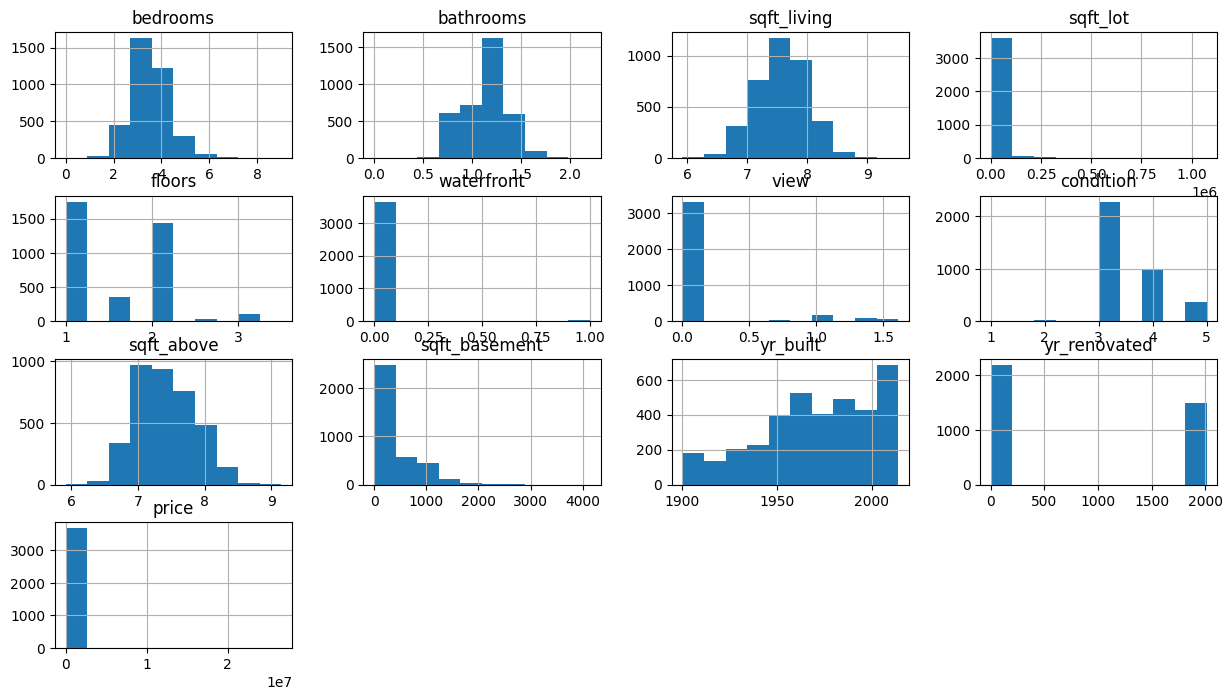

In [84]:
train_data.hist(figsize = (15,8))

In [92]:
from sklearn.linear_model import LinearRegression

X_train , y_train = train_data.drop(['price'],axis = 1),train_data['price']

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [93]:
test_data = (X_test).join(y_test)

test_data['bathrooms'] = np.log(test_data['bathrooms'] + 1)
test_data['sqft_above'] = np.log(test_data['sqft_above'] + 1)
test_data['sqft_living'] = np.log(test_data['sqft_living'] + 1)
test_data['view'] = np.log(test_data['view'] + 1)

In [65]:
#test_data = test_data.drop(columns = ['city','country','statezip'], axis = 1)

In [66]:
#test_data = test_data.join(pd.get_dummies(test_data.street)).drop(['street'],axis =1)

In [94]:
X_test , y_test = test_data.drop(['price'],axis = 1),test_data['price']

In [95]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,Indian Trail,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
3610,3.0,0.526589,2.072912,8128,1.0,0,0.000000,3,2.072912,0,...,False,False,False,False,False,False,False,False,False,False
4506,2.0,0.526589,2.060124,9839,1.0,0,0.000000,3,2.060124,0,...,False,False,False,False,False,False,False,False,False,False
4031,3.0,0.812157,2.216173,38322,2.0,0,0.000000,3,2.216173,0,...,False,False,False,False,False,False,False,False,False,False
3338,3.0,0.812157,2.173835,7307,2.0,0,0.000000,3,2.173835,0,...,False,False,False,False,False,False,False,False,False,False
1634,3.0,0.698931,2.181088,11000,1.0,0,0.000000,4,2.099633,1290,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,4.0,0.698931,2.137628,9011,1.0,0,0.000000,5,2.074115,720,...,False,False,False,False,False,False,False,False,False,False
825,3.0,0.526589,2.067970,18513,1.0,0,0.000000,3,2.067970,0,...,False,False,False,False,False,False,False,False,False,False
1662,5.0,0.869742,2.219205,8239,2.0,0,0.869742,3,2.179322,1100,...,False,False,False,False,False,False,False,False,False,False
2744,3.0,0.894830,2.132091,1388,3.0,0,0.000000,3,2.132091,0,...,False,False,False,False,False,False,False,False,False,False


In [96]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,Indian Trail,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
4014,5.0,1.252763,7.828436,8050,1.0,0,0.0,4,7.307202,1020,...,False,False,False,False,False,False,False,False,False,False
2535,3.0,1.011601,7.596392,5560,1.0,0,0.0,4,7.003974,890,...,False,False,False,False,False,False,False,False,False,False
3194,4.0,1.386294,8.183397,35261,1.5,0,0.0,3,8.183397,0,...,False,False,False,False,False,False,False,False,False,False
1040,4.0,1.252763,7.742402,3680,2.0,0,0.0,3,7.742402,0,...,False,False,False,False,False,False,False,False,False,False
2835,3.0,0.916291,7.039660,8340,1.0,0,0.0,3,7.039660,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4.0,0.693147,7.333676,7200,1.5,0,0.0,3,7.244942,130,...,False,False,False,False,False,False,False,False,False,False
2597,2.0,0.916291,7.178545,12196,1.5,0,0.0,3,7.178545,0,...,False,False,False,False,False,False,False,False,False,False
3806,2.0,1.252763,7.057037,1458,2.0,0,0.0,3,6.947937,120,...,False,False,False,False,False,False,False,False,False,False
67,3.0,0.693147,6.918695,9945,1.0,0,0.0,4,6.918695,0,...,False,False,False,False,False,False,False,False,False,False


In [97]:
reg.score(X_test,y_test)

-63.10317393675268